# 1. 얼굴 이미지 로드 및 확인

           < 원본 이미지 확인 >


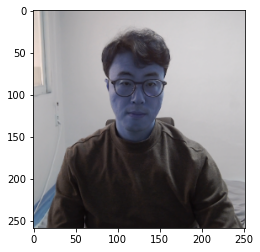

  

          < BGR -> RGB 보정 >


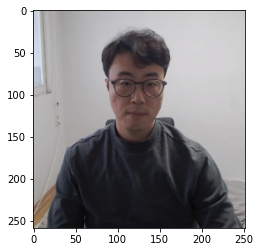

In [1]:

### 라이브러리 로드
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### 원본이미지 로드 및 확인, 보정
my_image_path = r"C:\Users\user\Desktop\AIFFEL\Day12\image.png"   # 파일 경로 지정
img_bgr = cv2.imread(my_image_path)    # OpenCV로 편집용 이미지를 로드.
img_show = img_bgr.copy()      # 최종 합성 및 출력용으로 따로 복사하여 보관.
print("           < 원본 이미지 확인 >")
plt.imshow(img_bgr)          # RGB 이미지 출력 1/2
plt.show()                   # RGB 이미지 출력 2/2

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # 편집용 이미지를 RGB로 변환.
print("  \n\n          < BGR -> RGB 보정 >")
plt.imshow(img_rgb)         # 편집용 이미지 RGB버전 출력 1/2
plt.show()                # 편집용 이미지 RGB버전 출력 2/2

# 2-1. 얼굴 검출

rectangles[[(88, 72) (162, 146)]]


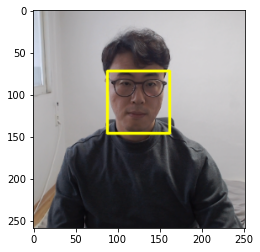

In [2]:
### detector 선언 및 bounding box 추출, 찾은 얼굴을 출력.
detector_hog = dlib.get_frontal_face_detector()   # Histogram of oriented gradients를 적용한 얼굴 디텍터 함수를 dlib에서 로드.

dlib_rects = detector_hog(img_rgb, 1) # 디텍터 사각형 인스턴스화. (대상 이미지, num of image pyramid). 피라미드 수 변경했더니 랜드마킹에 오차발생.

print(dlib_rects)   # 사각형 좌표가 출력됨 (시작점(세로행, 가로열), 끝점(세로행, 가로열.)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()  # 82
    t = dlib_rect.top()   # 66
    r = dlib_rect.right()   # 160
    b = dlib_rect.bottom()  # 143
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 255), 2, lineType = cv2.LINE_AA)  # 출력용 이미지에 사각형 결합. 라인 타입은 무엇?

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)     # 츌력용 이미지를 RGB로 변경
plt.imshow(img_show_rgb)  # 이미지출력
plt.show()            # 이미지 출력


# 2-2. 랜드마크 검출

68


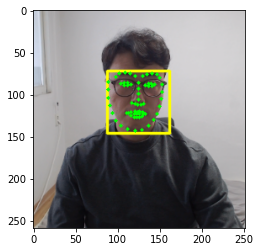

In [3]:
### Face landmark detection
model_path = r"C:\Users\user\Desktop\AIFFEL\Day12\shape_predictor_68_face_landmarks.dat"  # 랜드마크 근거 자료 위치 지정
landmark_predictor = dlib.shape_predictor(model_path)      # 랜드마크 예상함수의 근거 자료 장착

list_landmarks = []   # 랜드마크 리스트 초기값 정의

# 얼굴 영역 박스마다 face landmark를 찾아냄.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)   # 편집용 이미지의 dlib 사각형 안에 랜드마크 예측을 적용한 점들을 저장.
    print(points)
    # face landmark 좌표를 저장.
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    # parts(): 안의 원소를 나눈다. 나누어 p.x, p.y에 저장한 것을 리스트화한다.
    list_landmarks.append(list_points)   # 각 랜드마크 포인트를 리스트에 저장.
    
print(len(list_landmarks[0])) # 랜드마크 포인트의 좌표를 저장.랜드 마크리스트는 이중 리스트.

for landmark in list_landmarks: # 랜드마크 리스트에 대해(행을 카운트), 1차. 
    for point in landmark:     # 랜드마크 리스트에 대해(행을 카운트), 2차
        cv2.circle(img_show, point, 2, (0, 255, 0), -1) # 출력용 이미지에 인덱스 값에 해당하는 포인트(x, y)를 찍는다.
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # 출력용 이미지는 RGB로 변환한 것.
plt.imshow(img_show_rgb) # 출력.
plt.show()

# 3. 스티커 적용 위치 확인

In [4]:
## 스티커 시작 위치 지정
print('검출 사각형 시작지점: (%d, %d)'%(l,t))   

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # zip은 괄호 안의 복수 객체를 짝 지어줌.
    print ("코 끝의 좌표:",landmark[33])   # 코의 index는 30. 33번은 코 끝.
    w = h = dlib_rect.width()   # 스티커 폭(w)과 높이(h)를 검출 사각형의 크기로 한정하여 지정.
    x = landmark[33][0] - w//2  # 코를 스티커의 x중심으로 놓음
    y = int((landmark[30][1]+landmark[33][1])/2  - h//2) # 코 끝에서 위로 약간 올린 위치를 스티커의 y중심에 놓음. 
    # y가 연산결과 정수가 아니어서 뒷단 계산이 안 되어 정수화를 추가함.
    
print('붙일 스티커 크기(w,h): (%d, %d), 디텍터 사각형의 크기로 제한함'%(w,h))
print('스티커 시작지점(x,y): (%d, %d)'%(x,y))

# 스티커 이미지 로드 및 리사이즈
sticker_path = r"C:\Users\user\Desktop\AIFFEL\Day12\cat-whiskers.png"   # 스티커 경로 지정
img_sticker = cv2.imread(sticker_path)   # 스티커 읽어 인스턴스에 저장.
print("스티커 이미지 원본의 형태는:", img_sticker.shape)

rs_img_sticker = cv2.resize(img_sticker, (w,h))    
print("스티커 이미지의 리사이즈 결과 확인. 형태는:", rs_img_sticker.shape)

검출 사각형 시작지점: (88, 72)
코 끝의 좌표: (124, 112)
붙일 스티커 크기(w,h): (75, 75), 디텍터 사각형의 크기로 제한함
스티커 시작지점(x,y): (87, 72)
스티커 이미지 원본의 형태는: (512, 512, 3)
스티커 이미지의 리사이즈 결과 확인. 형태는: (75, 75, 3)


# 4-1. 스티커 적용하기 

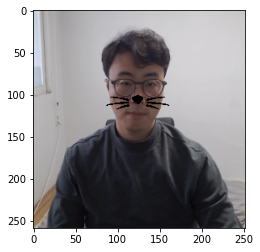

In [5]:
sticker_area = img_bgr[y:y+rs_img_sticker.shape[0], x:x+rs_img_sticker.shape[1]]  # 2차원 리스트이다.
img_bgr[y:y+rs_img_sticker.shape[0], x:x+rs_img_sticker.shape[1]] = \
np.where(rs_img_sticker!=0, sticker_area, rs_img_sticker).astype(np.uint8)  # 스티커 적용조건: 스티커 색이 검정색(RGB=0,0,0)인 지역
img_final = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_final)
plt.show()


# 4-2.얼굴이 다른 각도일 때의 적용

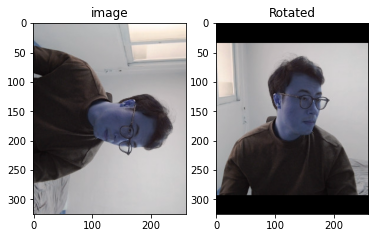

In [6]:
# 각도가 다른 이미지의 로드 및 회전

img = cv2.imread(r'C:\Users\user\Desktop\AIFFEL\Day12\Rot_selfie_Rt.jpg')

rows, cols, ch = img.shape

# 이미지의 중심점을 기준으로 90도 회전. 스케일은 유지.
M= cv2.getRotationMatrix2D((cols/2, rows/2),90, 1)

dst = cv2.warpAffine(img, M,(cols, rows))
dst_raw = dst.copy()
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Rotated')
plt.show()


rectangles[[(121, 105) (196, 179)]]


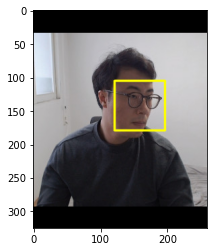

In [7]:
detector_hog = dlib.get_frontal_face_detector()   # Histogram of oriented gradients를 적용한 얼굴 디텍터 함수를 dlib에서 로드.

dlib_rects = detector_hog(dst, 1) # 디텍터 사각형 인스턴스화. (대상 이미지, num of image pyramid). 피라미드 수 변경했더니 랜드마킹에 오차발생.

print(dlib_rects)   # 사각형 좌표가 출력됨 (시작점(세로행, 가로열), 끝점(세로행, 가로열.)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()  # 82
    t = dlib_rect.top()   # 66
    r = dlib_rect.right()   # 160
    b = dlib_rect.bottom()  # 143
    
    cv2.rectangle(dst, (l,t), (r,b), (0, 255, 255), 2, lineType = cv2.LINE_AA)  # 출력용 이미지에 사각형 결합. 라인 타입은 무엇?
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) 
plt.imshow(dst_rgb)  # 이미지출력
plt.show()            # 이미지 출력

68


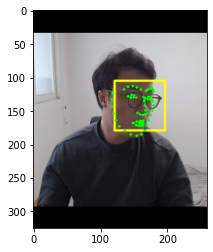

In [8]:
### Face landmark detection
landmark_predictor = dlib.shape_predictor(model_path)      # 랜드마크 예상함수의 근거 자료 장착

list_landmarks = []   # 랜드마크 리스트 초기값 정의

# 얼굴 영역 박스마다 face landmark를 찾아냄.
for dlib_rect in dlib_rects:
    points = landmark_predictor(dst_rgb, dlib_rect)   # 편집용 이미지의 dlib 사각형 안에 랜드마크 예측을 적용한 점들을 저장.
    print(points)
    # face landmark 좌표를 저장.
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    # parts(): 안의 원소를 나눈다. 나누어 p.x, p.y에 저장한 것을 리스트화한다.
    list_landmarks.append(list_points)   # 각 랜드마크 포인트를 리스트에 저장.
    
print(len(list_landmarks[0])) # 랜드마크 포인트의 좌표를 저장.랜드 마크리스트는 이중 리스트.

for landmark in list_landmarks: # 랜드마크 리스트에 대해(행을 카운트), 1차. 
    for point in landmark:     # 랜드마크 리스트에 대해(행을 카운트), 2차
        cv2.circle(dst, point, 2, (0, 255, 0), -1) # 출력용 이미지에 인덱스 값에 해당하는 포인트(x, y)를 찍는다.
        
dst_show_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) # 출력용 이미지는 RGB로 변환한 것.
plt.imshow(dst_show_rgb) # 출력.
plt.show()

In [9]:
## 스티커 시작 위치 지정
print('검출 사각형 시작지점: (%d, %d)'%(l,t))   

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # zip은 괄호 안의 복수 객체를 짝 지어줌.
    print ("코 끝의 좌표:",landmark[33])   # 코의 index는 30. 33번은 코 끝.
    w = h = dlib_rect.width()   # 스티커 폭(w)과 높이(h)를 검출 사각형의 크기로 한정하여 지정.
    x = landmark[33][0] - w//2  # 코를 스티커의 x중심으로 놓음
    y = int((landmark[30][1]+landmark[33][1])/2  - h//2) # 코 끝에서 위로 약간 올린 위치를 스티커의 y중심에 놓음. 
    # y가 연산결과 정수가 아니어서 뒷단 계산이 안 되어 정수화를 추가함.
    
print('붙일 스티커 크기(w,h): (%d, %d), 디텍터 사각형의 크기로 제한함'%(w,h))
print('스티커 시작지점(x,y): (%d, %d)'%(x,y))

# 스티커 이미지 로드 및 리사이즈
sticker_path = r"C:\Users\user\Desktop\AIFFEL\Day12\cat-whiskers.png"   # 스티커 경로 지정
img_sticker = cv2.imread(sticker_path)   # 스티커 읽어 인스턴스에 저장.
print("스티커 이미지 원본의 형태는:", img_sticker.shape)

rs_img_sticker = cv2.resize(img_sticker, (w,h))    
print("스티커 이미지의 리사이즈 결과 확인. 형태는:", rs_img_sticker.shape)

검출 사각형 시작지점: (121, 105)
코 끝의 좌표: (163, 156)
붙일 스티커 크기(w,h): (76, 76), 디텍터 사각형의 크기로 제한함
스티커 시작지점(x,y): (125, 114)
스티커 이미지 원본의 형태는: (512, 512, 3)
스티커 이미지의 리사이즈 결과 확인. 형태는: (76, 76, 3)


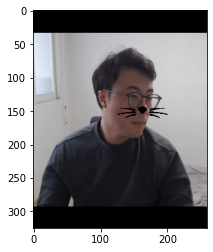

In [10]:
sticker_area = dst_raw[y:y+rs_img_sticker.shape[0], x:x+rs_img_sticker.shape[1]]  # 2차원 리스트이다.
dst_raw[y:y+rs_img_sticker.shape[0], x:x+rs_img_sticker.shape[1]] = \
np.where(rs_img_sticker!=0, sticker_area, rs_img_sticker).astype(np.uint8)  # 스티커 적용조건: 스티커 색이 검정색(RGB=0,0,0)인 지역
img_final = cv2.cvtColor(dst_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_final)
plt.show()


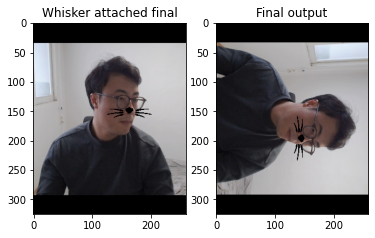

In [11]:
# 이미지의 중심점을 기준으로 90도 회전. 스케일은 유지.
M= cv2.getRotationMatrix2D((cols/2, rows/2), 270, 1)

dst_final = cv2.warpAffine(img_final, M,(cols, rows))

plt.subplot(121),plt.imshow(img_final),plt.title('Whisker attached final')
plt.subplot(122),plt.imshow(dst_final),plt.title('Final output')
plt.show()


# 회고

## 기준 1, 2(1 ~ 4-1번)
#### 이미지의 위치를 잡아 불러왔는데 , 위치는 대략 조정된 듯한데 배경이 하얗게 나옴.
#### cv로드시 red, blue 채널이 바뀐것임을 찾아내고 변환. --> 의미없음. 4번 채널에서 이것저것 변경시켜가며 코드의 기능을 확인해 봄.
#### 그래도 모르겠어서 맨 위부터 일일이 주석을 달며 기능을 서술함.  
#### 랜드마크 확인 다음 단계는 아래와 같이 진행됨을 확인
#### (1) sticker_area: 스티커가 적용되는 영역을 지정. 스티커 시작 지점부터 스티커의 폭, 높이 만큼 확장(=스티커의 크기와 동일한 면적)
#### (2) sticker_area에 대해, np.where를 적용하여 스티커이미지의 색이 검정색이 아니면 원본을 적용하고 검정색이면 스티커를 적용
### 이 부분을 굉장히 늦게 확인했는데, 그 이유는 **현재 셀만 재실행할 경우 변경사항이 제대로 적용되지 않기 때문**이었다. 전체 재실행하자 변경사항 정확히 반영됨을 확인. 앞으로 이미지 작업 시에는 전체 재실행하는 것을 습관 들여야 겠다.

## 기준 3(4-2번)
#### 회전에 대해, 전면이 아닌 측면을 보고 있는 회전된 얼굴을 잡으면 스티커도 그만큼 회전되어야 하고, 검색결과 Affine에 대한 지식이 필요하다는 것을 확인하였다.
#### 하지만 이를 구현하기에는 시간이 모자란 관계로, 대신 프레임 전체가 회전된 사진을 가져와서 입히는 것을 수행하였다. 
#### 턱이 아래로 내려온 일반 얼굴이 아닐 경우 디텍터의 감지 행위에 한계가 있었다는 것을 조원들로부터 들었다. 이에, 디텍터를 회전하지 않고 이미지를 회전하여 잡은 후 스티커를 입히고 회전을 원복시키는 방법으로 작업을 수행하였다.